In [6]:
import mysql.connector
from typing import List
import matplotlib.pyplot as plt
import datetime

In [7]:
class DtoClampPoint:
    def __init__(self, C1ACRMS, C1TrueRMS, Time):
        self.C1ACRMS = C1ACRMS
        self.C1TrueRMS = C1TrueRMS
        self.Time = Time

class DtoPlugPoint:
    def __init__(self, Watt, Current, Voltage, Ip, Time,React, Apparent ,PowFactor):
        self.Watt = Watt
        self.Current = Current
        self.Voltage = Voltage
        self.Ip = Ip
        self.Time = Time
        self.React = React
        self.Apparent = Apparent
        self.PowerFactor = PowFactor

class TimeSeries:
    def __init__(self):
        self.Samples = []

class Sample:
    def __init__(self, CpuUtilization, ElapsedTime, AdditionalMetadata, 
                 DramEnergyInJoules, GpuEnergyInJoules, PackageTemperature, 
                 ProcessorPowerWatt, CpuEnergyInJoules):
        self.CpuUtilization = CpuUtilization
        self.ElapsedTime = ElapsedTime
        self.AdditionalMetadata = AdditionalMetadata
        self.DramEnergyInJoules = DramEnergyInJoules
        self.GpuEnergyInJoules = GpuEnergyInJoules
        self.PackageTemperature = PackageTemperature
        self.ProcessorPowerWatt = ProcessorPowerWatt
        self.CpuEnergyInJoules = CpuEnergyInJoules



In [8]:
def FetchClampResults(startTime: datetime, endTime: datetime) -> List[DtoClampPoint]:
    points = []
    config = {"host": "mysql47.unoeuro.com", "user": "stemlevelup_com", "password": "ez3rnBAx92p4", "database": "stemlevelup_com_db"}

    with mysql.connector.connect(**config) as connection:

        formattedStartTime = startTime.strftime("%Y-%m-%d %H:%M:%S.%f")
        formattedEndTime = endTime.strftime("%Y-%m-%d %H:%M:%S.%f")

        cursor = connection.cursor()
        query = "SELECT * FROM Measurements WHERE time BETWEEN %s AND %s"
        cursor.execute(query, (formattedStartTime, formattedEndTime))

        for (id,C1TrueRMS, C1ACRMS, time) in cursor:
            points.append(DtoClampPoint(C1ACRMS, C1TrueRMS, time))

        cursor.close()

        if len(points) == 0:
            raise ClampQueryFoundNoPointsException
    return points

def CalculateTimeSeries(startTime: datetime, endTime: datetime) -> TimeSeries:
    results = FetchClampResults(startTime,endTime)
    timeSeries = TimeSeries()
    elapsedMilliseconds = (endTime - startTime).total_seconds() * 1000
    avgRate = len(results) / (elapsedMilliseconds / 1000)

    for item in results:
        test = ConvertToJoule(item.C1TrueRMS , len(results))/avgRate
        timeSeries.Samples.append(Sample(
            CpuEnergyInJoules=test,
            ElapsedTime=(item.Time - startTime).total_seconds() * 1000,
            AdditionalMetadata={},
            CpuUtilization=0,
            DramEnergyInJoules=0,
            GpuEnergyInJoules=0,
            PackageTemperature=0,
            ProcessorPowerWatt=0
        ))

    return timeSeries

def ConvertToJoule(measurement: float, count: int) -> float:
    miliVolt = measurement * 1000 # Converts from volt to milliJoule
    A = miliVolt / 100 # Uses the specific conversion ratio
    joule = A * 230
    return joule


In [9]:
def FetchPlugResults(startTime: datetime, endTime: datetime) -> List[DtoPlugPoint]:
    points = []
    config = {"host": "mysql47.unoeuro.com", "user": "stemlevelup_com", "password": "ez3rnBAx92p4", "database": "stemlevelup_com_db"}

    with mysql.connector.connect(**config) as connection:
        formattedStartTime = startTime.strftime("%Y-%m-%d %H:%M:%S.%f")
        formattedEndTime = endTime.strftime("%Y-%m-%d %H:%M:%S.%f")

        cursor = connection.cursor()
        query = "SELECT * FROM power_usage WHERE time BETWEEN %s AND %s AND Ip = %s"
        cursor.execute(query, (formattedStartTime, formattedEndTime, "192.168.1.150"))

        for (id, Watt, Current, Voltage, Ip, time, React, Apparent ,PowFactor) in cursor:
            points.append(DtoPlugPoint(Watt, Current, Voltage, Ip, time,React, Apparent ,PowFactor))

        cursor.close()

        if len(points) == 0:
            raise PlugQueryFoundNoPointsException

    return points


def convert_watt_to_joule(watt, count, duration):
    avg_rate = count / (duration / 1000)
    return watt / avg_rate

def fetch_results(start_time, end_time):
    results = FetchPlugResults(start_time, end_time)
    elapsedMilliseconds = (end_time-start_time).total_seconds() * 1000
    time_series = TimeSeries()
    for item in results:
        time_series.Samples.append(Sample(
            CpuEnergyInJoules= convert_watt_to_joule(item.Watt, len(results), elapsedMilliseconds),
            ElapsedTime = (item.Time - start_time).total_seconds() * 1000,
            AdditionalMetadata={"PowerFactor":item.PowerFactor},
            CpuUtilization=0,
            DramEnergyInJoules=0,
            GpuEnergyInJoules=0,
            PackageTemperature=0,
            ProcessorPowerWatt=0,
            ))
    return time_series


2023-04-17 13:53:03.920528
2023-04-18 03:53:03.920528
480211
473513


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


473513
480211


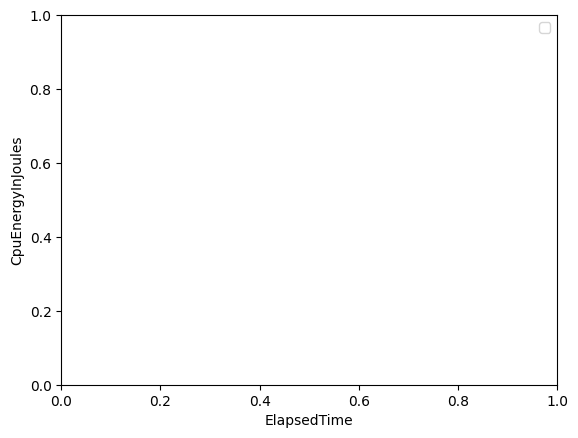

[0.64, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.63, 0.63, 0.61, 0.61, 0.61, 0.61, 0.61, 0.6, 0.6, 0.63, 0.63, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.61, 0.61, 0.62, 0.62, 0.61, 0.61, 0.63, 0.63, 0.63, 0.63, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.61, 0.61, 0.62, 0.62, 0.63, 0.63, 0.61, 0.61, 0.61, 0.61, 0.62, 0.62, 0.62, 0.62, 0.63, 0.63, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.62, 0.62, 0.63, 0.63, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.62, 0.62, 0.63, 0.63, 0.62, 0.62, 0.62, 0.62, 0.61, 0.61, 0.62, 0.62, 0.63, 0.63, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.62, 0.62, 0.64, 0.64, 0.62, 0.62, 0.62, 0.62, 0.61, 0.61, 0.61, 0.61, 0.64, 0.64, 0.62, 0.62, 0.62, 0.62, 0.61, 0.61, 0.61, 0.61, 0.64, 0.64, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.61, 0.61, 0.63, 0.62, 0.62, 0.62, 0.62, 0.61, 0.61, 0.62, 0.64, 0.64, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.64, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.63, 0.61, 0.61, 0.61, 0.61,

In [15]:

current_time = datetime.datetime.now()
format_string = "%Y-%m-%d %H:%M:%S.%f"
# date_string = "2023-03-30 10:30:54.0" #plug
date_string = "2023-04-14 10:29:52.0" #clamp
start_time = current_time - datetime.timedelta(hours=20)
# end_time = current_time - datetime.timedelta(hours=15)
# start_time = datetime.datetime.strptime(date_string, format_string)
# start_time = start_time - datetime.timedelta(seconds=10)
end_time = start_time + datetime.timedelta(hours=19)
print(start_time)
print(end_time)
ClampTS =  CalculateTimeSeries(start_time,end_time)
PlugTS = fetch_results(start_time, end_time)
print(len(ClampTS.Samples))
print(len(PlugTS.Samples))
import matplotlib.pyplot as plt

# extract data for ClampTS
clamp_x = [s.ElapsedTime for s in ClampTS.Samples]
clamp_y = [s.CpuEnergyInJoules for s in ClampTS.Samples]

# extract data for PlugTS
plug_x = [s.ElapsedTime for s in PlugTS.Samples]
plug_y = [s.CpuEnergyInJoules for s in PlugTS.Samples]
plug_PF = [s.AdditionalMetadata["PowerFactor"] for s in PlugTS.Samples]
print(len(plug_y))
print(len(clamp_y))

# plot the data
# plt.plot(clamp_x, clamp_y, color='blue', label='ClampTS')
# plt.plot(plug_x, plug_y, color='green', label='PlugTS')


# add axis labels and legend
plt.xlabel('ElapsedTime')
plt.ylabel('CpuEnergyInJoules')
plt.legend()

# show the plot
plt.show()
print(plug_PF)

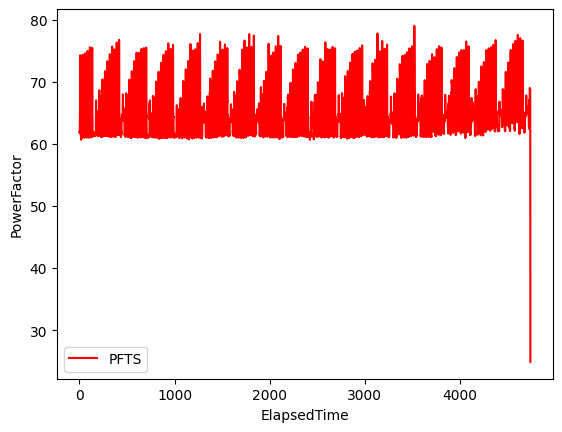

[0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.61, 0.61, 0.62, 0.62, 0.61, 0.61, 0.61, 0.61, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.61, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.61, 0.61, 0.61, 0.61, 0.62, 0.62, 0.61, 0.61, 0.61, 0.61, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.6

In [14]:
group_size = 100
grouped_sums = []
for i in range(0, len(plug_PF), group_size):
    group_sum = sum(plug_PF[i:i+group_size])
    grouped_sums.append(group_sum)

group_n = list(range(0,len(grouped_sums)))

plt.plot(group_n,grouped_sums, color='red', label='PFTS')
# add axis labels and legend
plt.xlabel('ElapsedTime')
plt.ylabel('PowerFactor')
plt.legend()

# show the plot
plt.show()
print(plug_PF)

[6.226117741567182, 6.12900467330806, 6.266248745869727, 6.213010970012509, 6.087837275594901, 6.174265586767652, 5.932630210008405]
[4.751445825932504, 4.561513321492008, 4.737815275310835, 4.781872113676732, 4.628227353463588, 4.631328596802842, 4.272660633229018]


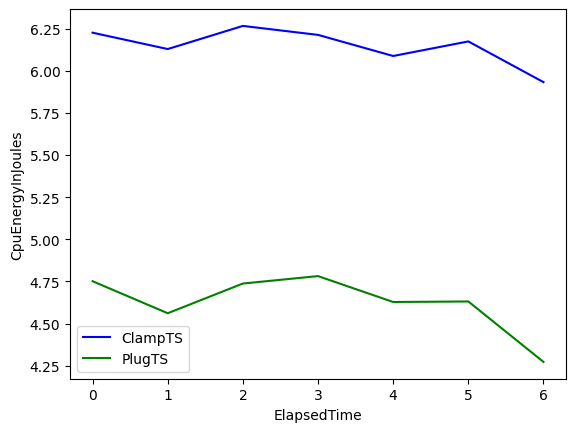

In [ ]:
import numpy as np
ClampMean = []
PlugMean = []
stepSize = 10000
for i in range(0,len(clamp_y),stepSize):
    res = np.mean(clamp_y[i:i+stepSize])
    ClampMean.append(res)
for i in range(0,len(plug_y),stepSize):
    res = np.mean(plug_y[i:i+stepSize])
    PlugMean.append(res)

plt.plot(ClampMean, color='blue', label='ClampTS')
plt.plot(PlugMean, color='green', label='PlugTS')
print(ClampMean)
print(PlugMean)
# add axis labels and legend
plt.xlabel('ElapsedTime')
plt.ylabel('CpuEnergyInJoules')
plt.legend()

# show the plot
plt.show()